In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

In [2]:
from qiskit import QuantumCircuit
from qiskit import Aer, execute, transpile 
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import Statevector


/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


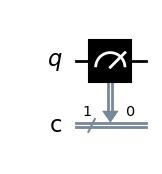

{'0': 1000}


In [3]:
' hay que elegir un método de ejecución del circuito(backend), puede ser real, o simulado'
M_simulator = Aer.get_backend('qasm_simulator')

qc=QuantumCircuit(1,1)
#qc.x(0)
#qc.h(0)
#qc.u(np.pi/3,np.pi/5,0,0)
qc.measure(0,0)

display(qc.draw('mpl'))

# opción 1
job=execute(qc,backend=M_simulator,shots=1000) 
result=job.result()
counts=result.get_counts()

# opción 2
#qcobj = transpile(qc, M_simulator )      # Crea un objeto compilado a partir del circuito  
#job = M_simulator.run(qcobj, shots=2048) # Hacemos la simulación 2048 veces 
#resultado=job.result()
#counts=resultado.get_counts()

'escribimos las cuentas'
print(counts)

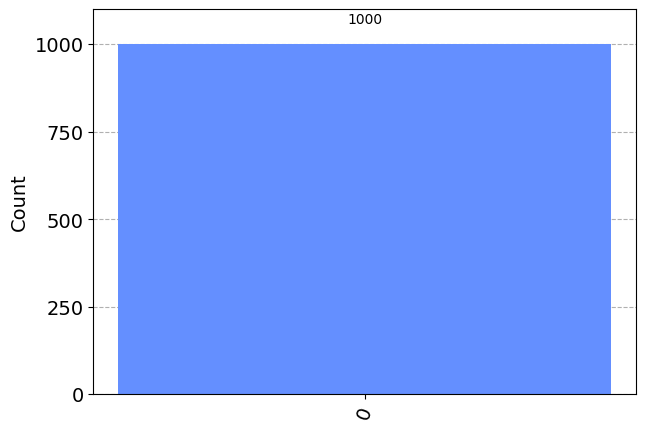

In [4]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts) # Mostramos un histograma de resultados

In [5]:
psi_state= tQ.random_ket(2).reshape(2)
display(Statevector(psi_state).draw('latex'))
#display(Statevector(psi_state).draw('Bloch'))

<IPython.core.display.Latex object>

In [6]:
p0 = np.abs(psi_state[0])**2
p1 = np.abs(psi_state[1])**2

print('p(0)=', np.round(p0,5),', p(1)=', np.round(p1,5))


p(0)= 0.36198 , p(1)= 0.63802


/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


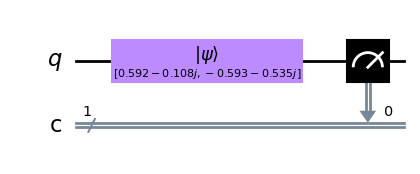

counts_psi =  {'1': 637654, '0': 362346}


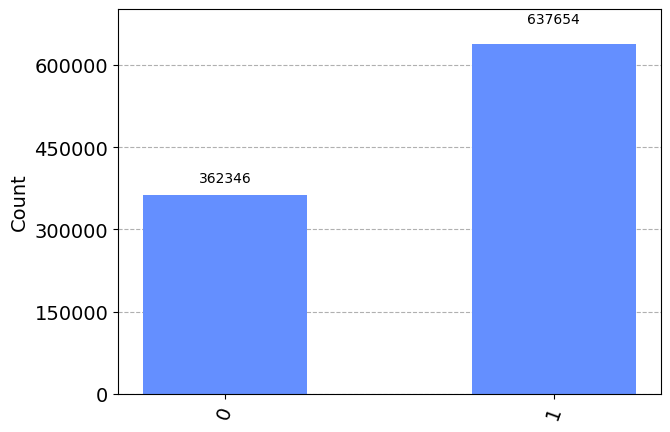

In [7]:
qc_psi = QuantumCircuit(1,1)
qc_psi.initialize(psi_state,0)
qc_psi.measure(0,0)
display(qc_psi.draw('mpl'))

nshots = 1000000
counts_psi = execute(qc_psi,M_simulator,shots=nshots).result().get_counts()
print('counts_psi = ',counts_psi)

plot_histogram(counts_psi) # Mostramos un histograma de resultados

In [8]:
p0_exp = counts_psi['0']/nshots
p1_exp = counts_psi['1']/nshots

print('p(0)_exp =', p0_exp,'  p(1)_exp = ',p1_exp)

p(0)_exp = 0.362346   p(1)_exp =  0.637654


In [9]:
#uncomment and paste your token
#IBMQ.save_account('')

In [10]:
from qiskit import IBMQ
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q')
# provider.backends()

In [11]:
# from qiskit.providers.ibmq import least_busy
# IBMQ_best_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 1 
#                                       and not x.configuration().simulator 
#                                       and x.status().operational==True))
# print("least busy backend: ", IBMQ_best_backend)

In [12]:
# qobj = transpile(qc_psi, IBMQ_best_backend)           # Compila el código para el backend
# job = IBMQ_best_backend.run(qobj, shots=1024) # Hacemos la simulación 1024 veces 

In [13]:
# from qiskit.tools.monitor import job_monitor
# job_monitor(job)

In [14]:
# counts = job.result().get_counts()
# print("Cuentas=",counts)

In [15]:
# plot_histogram(counts)

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


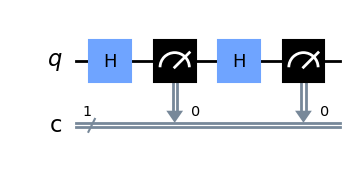

In [16]:
qc = QuantumCircuit(1,1)

qc.h(0)
qc.measure(0,0) #anula o no esta medición intermedia para ver la diferencia
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

In [17]:
M_simulator = Aer.get_backend('qasm_simulator')

execute(qc,M_simulator).result().get_counts()

{'1': 506, '0': 518}

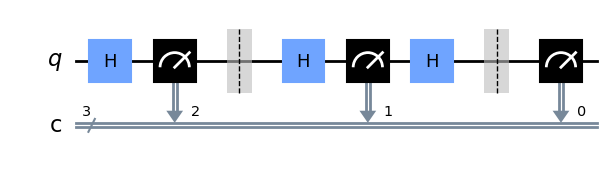

{'101': 1}

In [18]:
'solucion'
qc = QuantumCircuit(1,3)

qc.h(0)

qc.measure(0,2)

qc.barrier()
qc.h(0)
qc.measure(0,1)
qc.h(0)
qc.barrier()

qc.measure(0,0)

display(qc.draw('mpl'))

execute(qc,M_simulator,shots=1).result().get_counts()


In [19]:
def measure_XYZ(qc,axis="Z",shots=1024):
    'needs execute'
    import copy 
    qc0 = copy.deepcopy(qc)
    if axis == "Z":
        qc0.measure(0,0)
    if axis == "X":
        qc0.h(0)
        qc0.measure(0,0) 
        qc0.h(0)
    elif axis == "Y":
        qc0.sdg(0)
        qc0.h(0)
        qc0.measure(0,0) 
        qc0.h(0)
        qc0.s(0)
        
    counts=execute(qc0,backend=Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()
    
    return counts

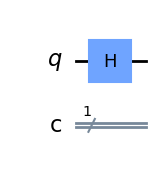

cuentas(base Z)= {'0': 5017, '1': 4983}
cuentas(base X)= {'0': 10000}
cuentas( base Y)= {'1': 4966, '0': 5034}


In [20]:
shots = 10000

qc = QuantumCircuit(1,1)
qc.h(0)
display(qc.draw('mpl'))

cuentasz = measure_XYZ(qc,axis="Z",shots=shots)
print("cuentas(base Z)=",cuentasz)

cuentasx = measure_XYZ(qc,axis="X",shots=shots)
print("cuentas(base X)=",cuentasx)

cuentasy = measure_XYZ(qc,axis="Y",shots=shots)
print("cuentas( base Y)=",cuentasy)


<IPython.core.display.Latex object>

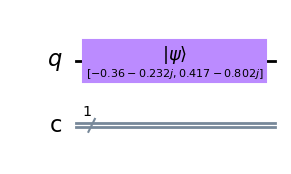

In [21]:
psi_state= tQ.random_ket(2).reshape(2)
display(Statevector(psi_state).draw('latex'))
qc_psi = QuantumCircuit(1,1)
qc_psi.initialize(psi_state,0)
qc_psi.draw('mpl')

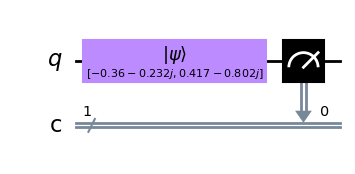

{'0': 1800, '1': 8200}

In [22]:
'añadimos el medidor, trabajaremos con una copia del circuito'
import copy
qc_psi_copy = copy.deepcopy(qc_psi)
qc_psi_copy.measure(0,0)
display(qc_psi_copy.draw('mpl'))

shots = 10000
counts_psi = execute(qc_psi_copy,M_simulator,shots = shots).result().get_counts()
display(counts_psi)

In [23]:
mean_Z = 0

for bits, counts  in counts_psi.items():
    mean_Z += (-1)**(int(bits))* (counts/shots)

print('<Z> =',np.round(mean_Z,5))

<Z> = -0.64


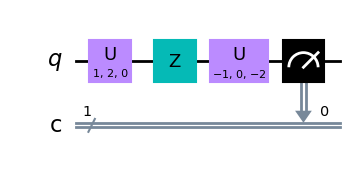

<A> = 0.53961


In [24]:
#from qiskit.circuit.library.standard_gates import U3Gate
M_simulator = Aer.get_backend('qasm_simulator')

'definimos un estado arbitrario en la esfera de Bloch'
theta = 1.  #rad
phi   = 2.  #rad

' el operador unitario que lo genera a partir de |0> es u(theta, phi, 0,0)'
qc_Upsi = QuantumCircuit(1,1)
qc_Upsi.u(theta,phi,0,0)
qc_Upsi.z(0)
#qc_Upsi.x(0)
#qc_Upsi.y(0)
qc_Upsi.u(-theta,0,-phi,0)

qc_Upsi.measure(0,0)

display(qc_Upsi.draw('mpl'))

' ejecutamos '
shots= 100000
counts=execute(qc_Upsi,backend=M_simulator,shots=shots).result().get_counts()

' ahora solo nos interesa la fracción de 0s '
mean_A = np.sqrt(counts['0']/shots)
print('<A> =',np.round(mean_A,5))
